In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [47]:
df = pd.read_csv('kbClean.csv')

In [48]:
df.head()

,NameKlinik,Erfahrungsbericht,Gesamt,QualBeratung,MedBehandlung,VerwalAblaeufe,Zufriedenheit,ist_zufrieden,Polarity Level,Polarity Stimmung
0,HEH Herzogin Elisabeth Hospital,Sehr höfliche und hilfsbereite Mitarbeiter. S...,5.0,5.0,5.0,5.0,pos,1,0.462500,pos
1,HEH Herzogin Elisabeth Hospital,Kann ich nur weiterempfehlen!! Sehr gutes Pfle...,5.0,3.7,5.0,3.7,pos,1,0.000000,neg
2,HEH Herzogin Elisabeth Hospital,Bestens durchorganisiert.gutes Personal geht i...,5.0,5.0,5.0,5.0,pos,1,0.000000,neg
3,HEH Herzogin Elisabeth Hospital,Bin nach einem Autounfall im HEH gewesen und h...,5.0,5.0,5.0,5.0,pos,1,0.340000,pos
4,HEH Herzogin Elisabeth Hospital,Wurde bereits im Sept. 2020 am Knie operiert. ...,5.0,5.0,5.0,5.0,pos,1,0.242857,pos


In [92]:
klinik_df = df[df['NameKlinik'] == 'HEH Herzogin Elisabeth Hospital']

In [103]:
berichte = []
for i in klinik_df['Erfahrungsbericht']:
    berichte.append(i)
berichte[0]

'Sehr höfliche und hilfsbereite Mitarbeiter.  Sehr schöne Außenanlage die besser gepflegt werden könnte. Frostschäden an Rosen.  Sehr fähiges medizinisches Personal jederzeit gerne wieder.'

In [66]:
kb_stars = df[['NameKlinik', 'Gesamt', 'Zufriedenheit']]
kb_means = kb_stars.groupby(['NameKlinik'], as_index=False)['Gesamt'].mean()
kb_means = kb_means.sort_values('Gesamt',ascending=False, ignore_index=True)
vergleich_list = kb_means['Gesamt'].to_list()

In [73]:
vergleich_klinikname = kb_means['NameKlinik'].to_list()

In [72]:
vergleich_list

[4.654545454545455,
 4.375510204081633,
 4.180769230769231,
 4.118536585365854,
 4.002272727272726,
 3.966666666666667,
 3.836111111111111,
 3.7371165644171804,
 3.717073170731706,
 3.526344086021506,
 3.4937931034482754,
 3.4578947368421056,
 3.4066390041493784,
 3.3860465116279075,
 3.323706896551724,
 3.2615999999999996,
 3.2222222222222228,
 3.183064516129032,
 2.974038461538461,
 2.945762711864406,
 2.8430894308943087,
 2.8295238095238093,
 2.3818713450292393,
 2.231372549019608]

In [74]:
vergleich_klinikname

['Klinik Am Zuckerberg',
 'Eilenriede Klinik Hannover',
 'HEH Herzogin Elisabeth Hospital',
 'Klinik Fallingbostel',
 'Kreiskrankenhaus Osterholz',
 'Krankenhaus St. Martini',
 'AMEOS Klinikum Seepark Geestland',
 'Diana Klinik-Fachklinik für Physikalische Medizin',
 'Elbe Kliniken Stade - Buxtehude, Standort Buxtehude',
 'MediClin Klinikum Soltau',
 'Klinikum Peine gGmbH',
 'Sophienklinik GmbH',
 'DIAKOVERE Henriettenstift',
 'Kreiskrankenhaus Winsen',
 'Klinikum Wolfsburg',
 'HELIOS Klinik Cuxhaven',
 'Agaplesion - Diakonieklinikum Rotenburg',
 'Helios Kliniken Mittelweser - Krankenhaus Nienburg',
 'Heidekreis-Klinikum GmbH - Krankenhaus Walsrode',
 'KRH Klinikum Agness Karll Laatzen',
 'Kreiskrankenhaus Buchholz',
 'Klinikum Wahrendorff',
 'AMEOS Klinikum Hildesheim',
 'Psychiatrische Klinik Lüneburg']

In [7]:
dizi = df.groupby('NameKlinik')['Gesamt'].size()

In [8]:
dizi

NameKlinik
AMEOS Klinikum Hildesheim                              171
AMEOS Klinikum Seepark Geestland                       144
Agaplesion - Diakonieklinikum Rotenburg                297
DIAKOVERE Henriettenstift                              241
Diana Klinik-Fachklinik für Physikalische Medizin      326
Eilenriede Klinik Hannover                              49
Elbe Kliniken Stade - Buxtehude, Standort Buxtehude     82
HEH Herzogin Elisabeth Hospital                        130
HELIOS Klinik Cuxhaven                                 125
Heidekreis-Klinikum GmbH - Krankenhaus Walsrode        104
Helios Kliniken Mittelweser - Krankenhaus Nienburg     124
KRH Klinikum Agness Karll Laatzen                      118
Klinik Am Zuckerberg                                    77
Klinik Fallingbostel                                   205
Klinikum Peine gGmbH                                   145
Klinikum Wahrendorff                                   105
Klinikum Wolfsburg                           

In [59]:
df2 = df.groupby(['NameKlinik', 'Gesamt']).size().unstack().reset_index()

In [60]:
df2

Gesamt,NameKlinik,1.0,2.3,3.7,5.0
0,AMEOS Klinikum Hildesheim,95,14,23,39
1,AMEOS Klinikum Seepark Geestland,31,7,19,87
2,Agaplesion - Diakonieklinikum Rotenburg,107,25,25,140
3,DIAKOVERE Henriettenstift,66,30,30,115
4,Diana Klinik-Fachklinik für Physikalische Medizin,55,32,81,158
5,Eilenriede Klinik Hannover,5,2,4,38
6,"Elbe Kliniken Stade - Buxtehude, Standort Buxt...",18,7,11,46
7,HEH Herzogin Elisabeth Hospital,20,5,10,95
8,HELIOS Klinik Cuxhaven,48,6,7,64
9,Heidekreis-Klinikum GmbH - Krankenhaus Walsrode,45,8,7,44


In [64]:
df2.set_index('NameKlinik').T.to_dict('list')

{'AMEOS Klinikum Hildesheim': [95, 14, 23, 39],
 'AMEOS Klinikum Seepark Geestland': [31, 7, 19, 87],
 'Agaplesion - Diakonieklinikum Rotenburg': [107, 25, 25, 140],
 'DIAKOVERE Henriettenstift': [66, 30, 30, 115],
 'Diana Klinik-Fachklinik für Physikalische Medizin': [55, 32, 81, 158],
 'Eilenriede Klinik Hannover': [5, 2, 4, 38],
 'Elbe Kliniken Stade - Buxtehude, Standort Buxtehude': [18, 7, 11, 46],
 'HEH Herzogin Elisabeth Hospital': [20, 5, 10, 95],
 'HELIOS Klinik Cuxhaven': [48, 6, 7, 64],
 'Heidekreis-Klinikum GmbH - Krankenhaus Walsrode': [45, 8, 7, 44],
 'Helios Kliniken Mittelweser - Krankenhaus Nienburg': [48, 8, 9, 59],
 'KRH Klinikum Agness Karll Laatzen': [45, 13, 21, 39],
 'Klinik Am Zuckerberg': [4, 2, 4, 67],
 'Klinik Fallingbostel': [26, 13, 32, 134],
 'Klinikum Peine gGmbH': [44, 8, 16, 77],
 'Klinikum Wahrendorff': [47, 9, 12, 37],
 'Klinikum Wolfsburg': [74, 19, 32, 107],
 'Krankenhaus St. Martini': [11, 3, 10, 39],
 'Kreiskrankenhaus Buchholz': [59, 7, 8, 49],
 

In [ ]:
sozluk = {'AMEOS Klinikum Hildesheim':[95,14,23,39], 'HEH Herzogin Elisabeth Hospital':[20,5,10,95]}

In [39]:
df2.to_dict()

{1.0: {'AMEOS Klinikum Hildesheim': 95,
  'AMEOS Klinikum Seepark Geestland': 31,
  'Agaplesion - Diakonieklinikum Rotenburg': 107,
  'DIAKOVERE Henriettenstift': 66,
  'Diana Klinik-Fachklinik für Physikalische Medizin': 55,
  'Eilenriede Klinik Hannover': 5,
  'Elbe Kliniken Stade - Buxtehude, Standort Buxtehude': 18,
  'HEH Herzogin Elisabeth Hospital': 20,
  'HELIOS Klinik Cuxhaven': 48,
  'Heidekreis-Klinikum GmbH - Krankenhaus Walsrode': 45,
  'Helios Kliniken Mittelweser - Krankenhaus Nienburg': 48,
  'KRH Klinikum Agness Karll Laatzen': 45,
  'Klinik Am Zuckerberg': 4,
  'Klinik Fallingbostel': 26,
  'Klinikum Peine gGmbH': 44,
  'Klinikum Wahrendorff': 47,
  'Klinikum Wolfsburg': 74,
  'Krankenhaus St. Martini': 11,
  'Kreiskrankenhaus Buchholz': 59,
  'Kreiskrankenhaus Osterholz': 9,
  'Kreiskrankenhaus Winsen': 28,
  'MediClin Klinikum Soltau': 44,
  'Psychiatrische Klinik Lüneburg': 28,
  'Sophienklinik GmbH': 20},
 2.3: {'AMEOS Klinikum Hildesheim': 14,
  'AMEOS Klinikum S

In [26]:
df2.loc[df['NameKlinik'] == 'Sophienklinik GmbH']

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [22]:
#df2.to_dict()

## Word Cloud

In [79]:
german_stop_words = stopwords.words('german')

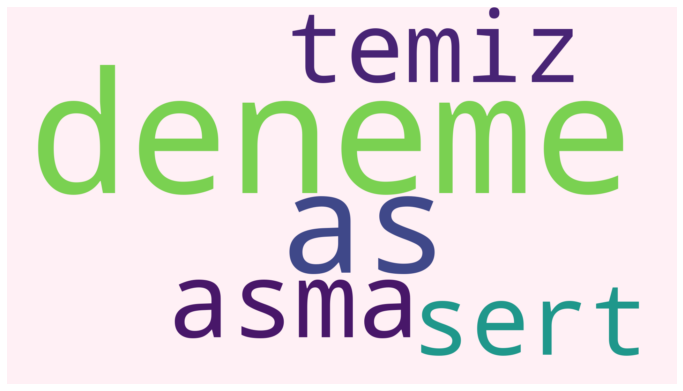

In [105]:
wordcloud = WordCloud(stopwords=german_stop_words, background_color="LavenderBlush",width=1920, height=1080, max_words=200).generate('Deneme deneme as asma temiz sert as deneme') #width=1920, , height=1080 reviewlist[0]
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig("img/drhoffman1.png") #, dpi=300
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

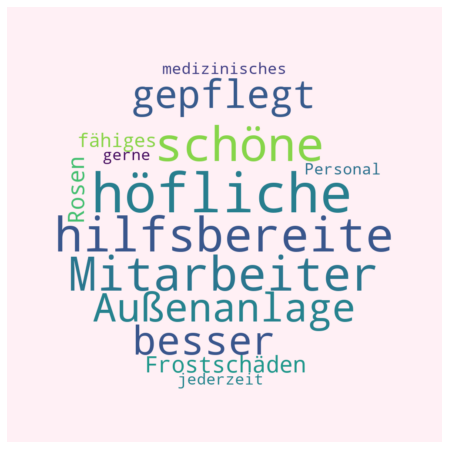

In [108]:
for p in range(len(df["NameKlinik"].unique())):
    x, y = np.ogrid[:1000, :1000]
    mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
    mask = 255 * mask.astype(int)
    wordcloud = WordCloud(stopwords=german_stop_words,background_color="LavenderBlush",width=1920, height=1080, mask=mask).generate(berichte[0])
    plt.imshow(wordcloud, extent=(8, 70, 8, 70), interpolation="bilinear")
    plt.axis("off")
    #plt.savefig('plot.png', dpi=300)
    #plt.savefig("drhoffmann.png", format="png")
    #plt.savefig("imgkreis/k_w_"+dfsentiment["Name der Klinik"][p]+".png", dpi=300)
    #plt.savefig("wc_klinik1.1/k_w_"+listeneu[p]+".png", dpi=300)
    #plt.show()

## Plot

In [ ]:
sns.jointplot(x='Zufriedenheit',y='Polarity Stimmung',data=df)

In [ ]:
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x="Gesamt",data=df)

In [ ]:
df.pivot_table(index=['NameKlinik'],columns='Zufriedenheit',aggfunc='size').plot(kind='bar')

In [ ]:
plt.figure(figsize=(10,20))
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.countplot(y='NameKlinik',data=df,hue='Gesamt', palette='Set1')

In [ ]:
df1 = df[df['NameKlinik'] == 'HEH Herzogin Elisabeth Hospital']
df2 = df[df['NameKlinik'] == 'Klinikum Wolfsburg']

In [ ]:
#fig, ax =plt.subplots(1,2)
plt.figure(figsize=(5,4),dpi=100)
sns.countplot(x='NameKlinik',data=df1,hue='Gesamt', palette='Set1')
#sns.countplot(ax=ax[1],x='NameKlinik',data=df2,hue='Gesamt', palette='Set1')

In [ ]:
# pip install pivottablejs

In [ ]:
# from pivottablejs import pivot_ui
# pivot_ui(df)

In [ ]:
### Checking for the Distribution of Default ###
verteilung= df.groupby('NameKlinik').Zufriedenheit.value_counts(normalize=True)*100
verteilung_df = verteilung.to_frame()
print(round(verteilung_df,2))

In [ ]:
verteilung_df.plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
verteilung_df.head()

In [ ]:
sns.set(style="dark",palette="muted",font_scale=2) #for backgraound and font
sns.distplot(df["Gesamt"],bins=20,kde=False,color="y")
plt.tight_layout()

## Pie Chart

In [ ]:
deneme = df[df['NameKlinik'] == 'AMEOS Klinikum Hildesheim'].groupby(['NameKlinik'])['Gesamt']
yenidf = deneme.value_counts().sort_values(ascending=False).to_frame()

In [ ]:
deneme

In [ ]:
yenidf

In [ ]:
data = yenidf.Gesamt.to_list()

In [ ]:
plt.pie(data ,labels=['unzufrieden','Sehr zufrieden','zufrieden','wenig'],explode = (0, 0, 0.3, 0), autopct='%1.3f%%',shadow=True, startangle=90)